In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the file 

In [6]:
#load the excel file as a dataframe
df = pd.read_excel('Makert Prices 2022.xlsx')
# first five rows
df.head()

,Dates,Seasons,Bull,Cow,Heifer,Steer
0,2009-08-01,Drought,8500.000000,966.666667,1666.666667,766.666667
1,2009-09-01,Drought,18000.000000,4000.000000,15000.000000,13000.000000
2,2009-10-01,Drought,8500.000000,5000.000000,8000.000000,9000.000000
3,2009-11-01,Drought,12484.312740,4815.021851,5198.550137,11302.715033
4,2009-12-01,Wet,22166.666667,9477.777778,10111.111111,18222.222222


In [16]:
df.columns

Index(['Dates', 'Seasons', 'Bull', 'Cow', 'Heifer', 'Steer'], dtype='object')

# Data Wrangling

In [7]:
# Basic metadata of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Dates    154 non-null    datetime64[ns]
 1   Seasons  154 non-null    object        
 2   Bull     154 non-null    float64       
 3   Cow      154 non-null    float64       
 4   Heifer   154 non-null    float64       
 5   Steer    154 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 7.3+ KB


### Completeness 

In [9]:
df.isna().any()

Dates      False
Seasons    False
Bull       False
Cow        False
Heifer     False
Steer      False
dtype: bool

In [11]:
df.isnull().sum()

Dates      0
Seasons    0
Bull       0
Cow        0
Heifer     0
Steer      0
dtype: int64

### Consistency

In [20]:
#checking for duplicates

f'There are {df.duplicated().sum()} duplicates in the dataframe'

'There are 0 duplicates in the dataframe'

### Validity

In [12]:
df['Seasons'].value_counts()

Seasons
Wet        50
Dry        50
dry        24
Drought    13
drought    12
wet         5
Name: count, dtype: int64

The `Dry` and `dry` seasons seem to be similar as well as the `Drought` and `drought` seasons and the `wet` and `Wet` seasons. So lets make them all the same by having them be Proper titles

In [13]:
df.Seasons = df.Seasons.str.title()
df['Seasons'].value_counts()

Seasons
Dry        74
Wet        55
Drought    25
Name: count, dtype: int64

Now we have 3 seasons
* Dry
* Wet
* Drought

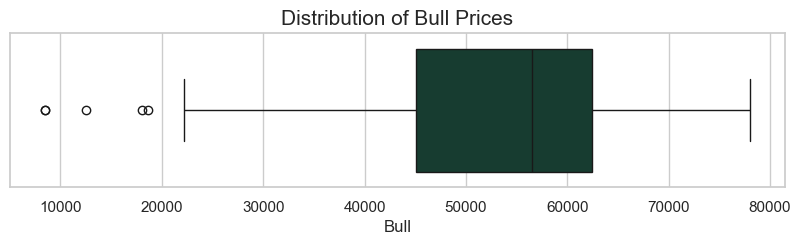

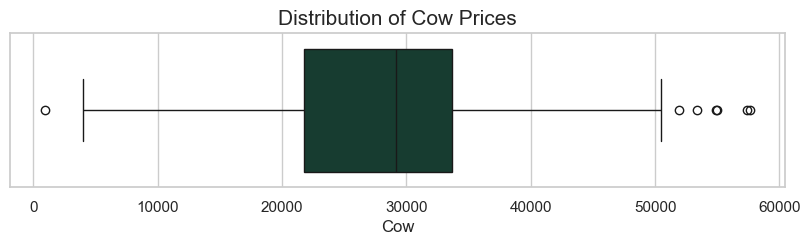

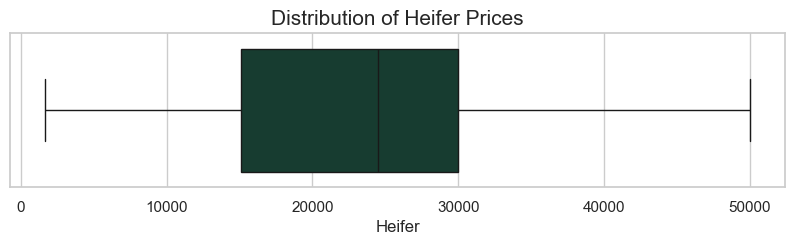

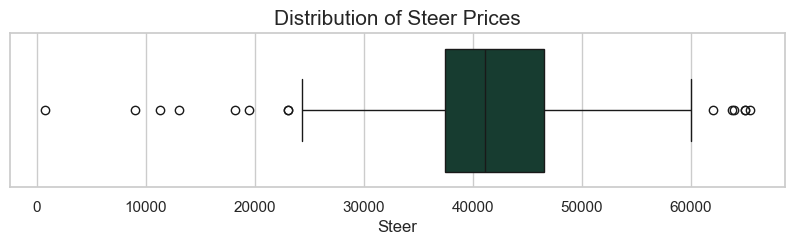

In [84]:
#Checking for outliers
def outliers(df, col):
    """
    This function visualises the outliers and outputs boxplots
    """
    plt.figure(figsize=(10,2))
    sns.boxplot(x=col, data=df, color= "#114232")
    plt.title(f'Distribution of {col} Prices', fontsize=15);

num_list=['Bull', 'Cow','Heifer', 'Steer']
for col in num_list:
    outliers(df,col)

In [25]:
df['Seasons']= df['Seasons'].astype('category')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Dates    154 non-null    datetime64[ns]
 1   Seasons  154 non-null    category      
 2   Bull     154 non-null    float64       
 3   Cow      154 non-null    float64       
 4   Heifer   154 non-null    float64       
 5   Steer    154 non-null    float64       
dtypes: category(1), datetime64[ns](1), float64(4)
memory usage: 6.4 KB


In [31]:
# Basic description of numerical features

df.describe().T

,count,mean,min,25%,50%,75%,max,std
Dates,154,2015-12-17 21:30:23.376623360,2009-08-01 00:00:00,2012-10-08 18:00:00,2015-12-16 12:00:00,2019-02-22 00:00:00,2022-07-29 00:00:00,NaN
Bull,154.0,53296.236208,8500.0,45100.0,56503.850527,62417.57515,78000.0,13837.139183
Cow,154.0,28102.985031,966.666667,21780.739223,29150.409072,33659.749804,57613.00104,9973.969461
Heifer,154.0,23831.001561,1666.666667,15083.333333,24461.740493,29975.666924,50000.0,10485.280024
Steer,154.0,41550.11114,766.666667,37421.703386,41150.249088,46531.278194,65411.537154,10678.454015


## Exploratory Data Analysis

### Univariate Analysis

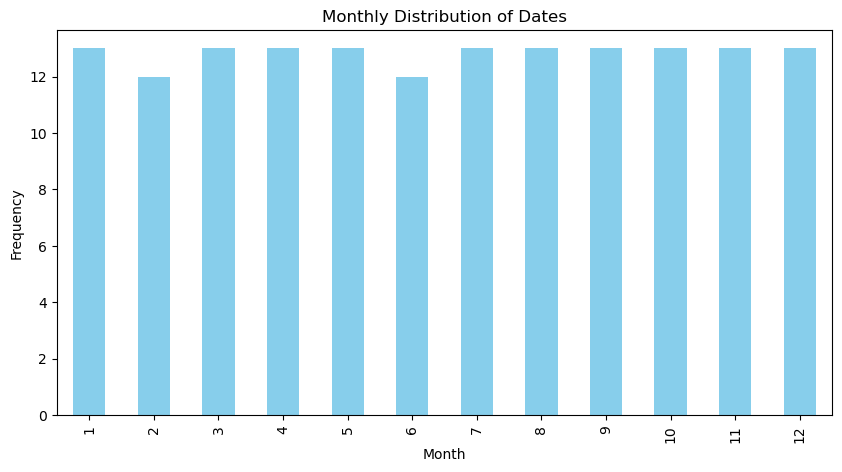

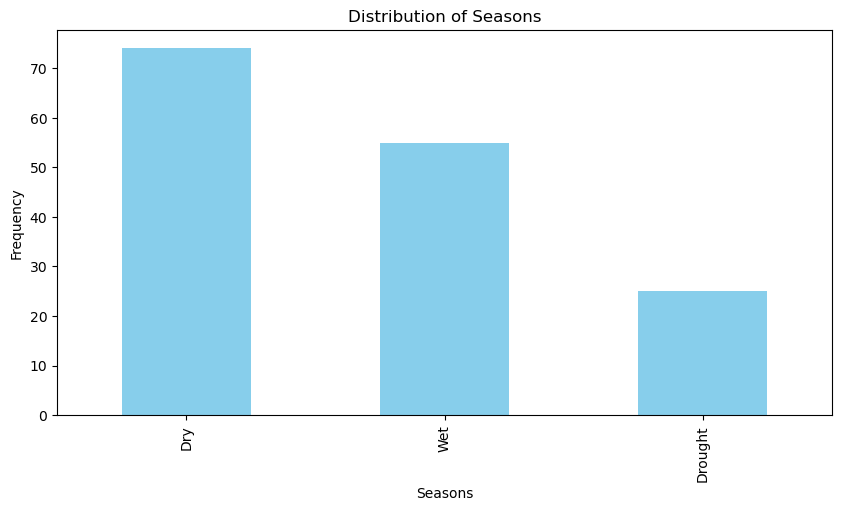

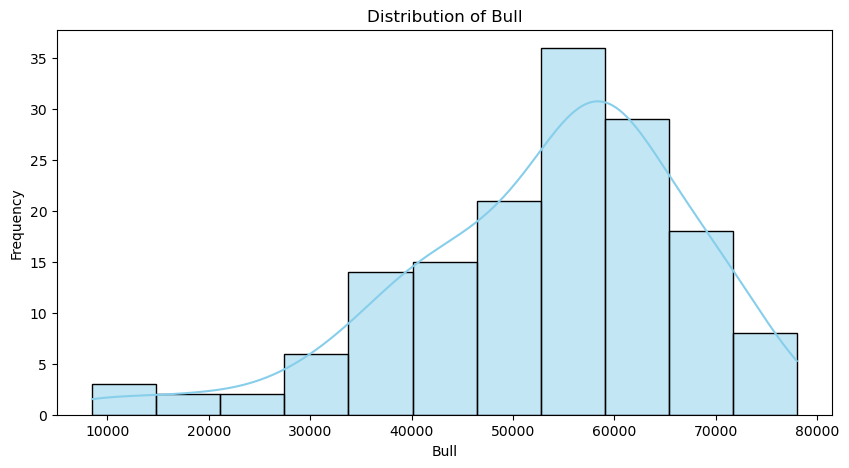

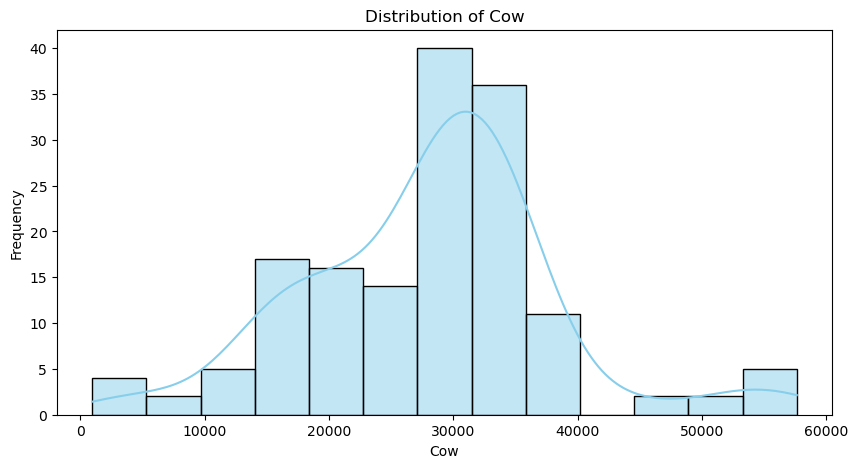

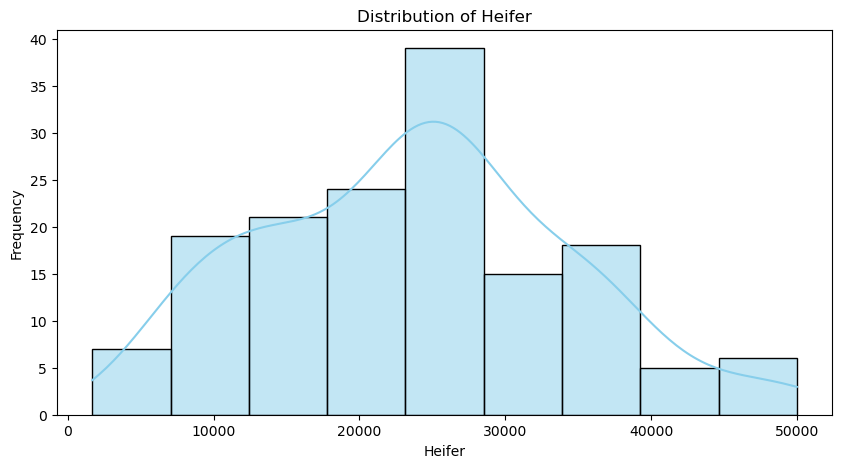

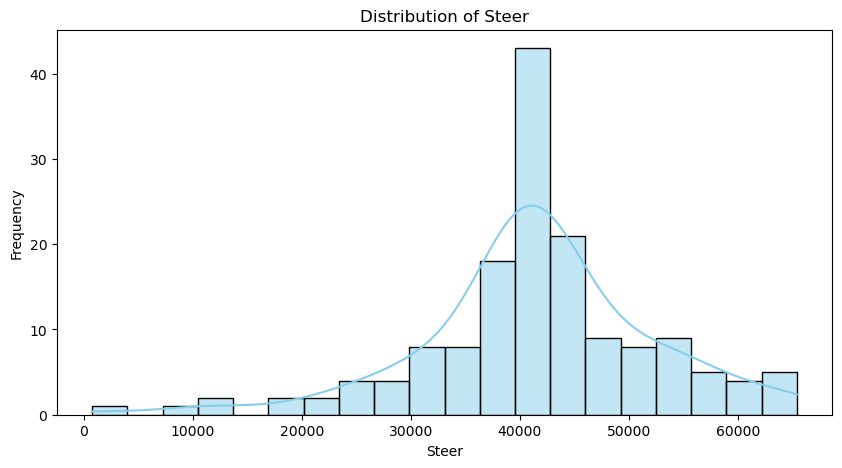

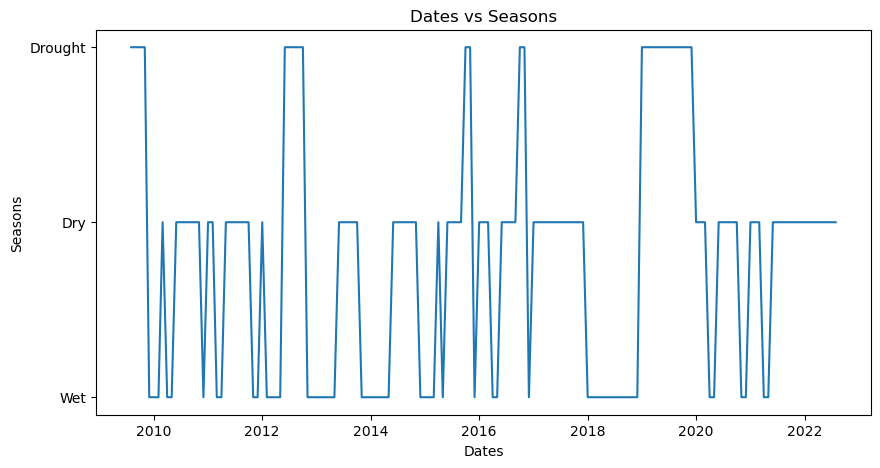

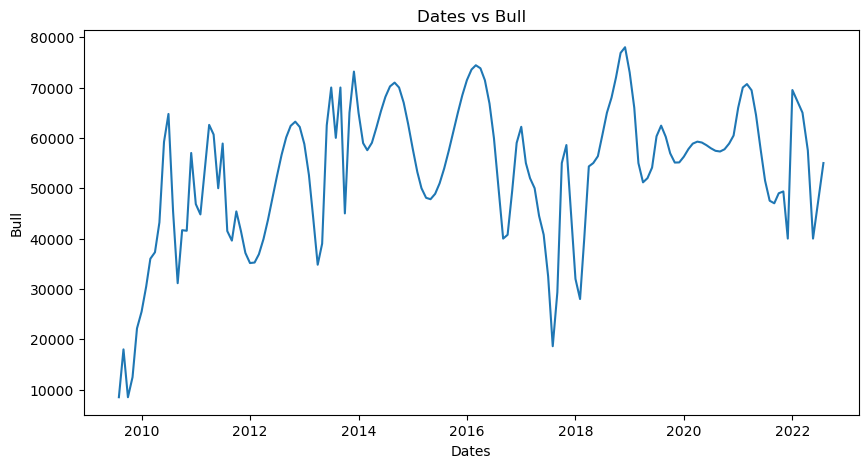

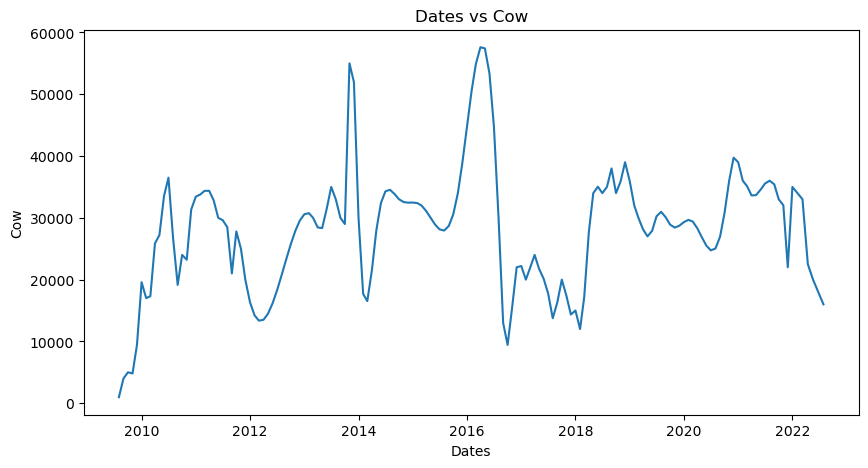

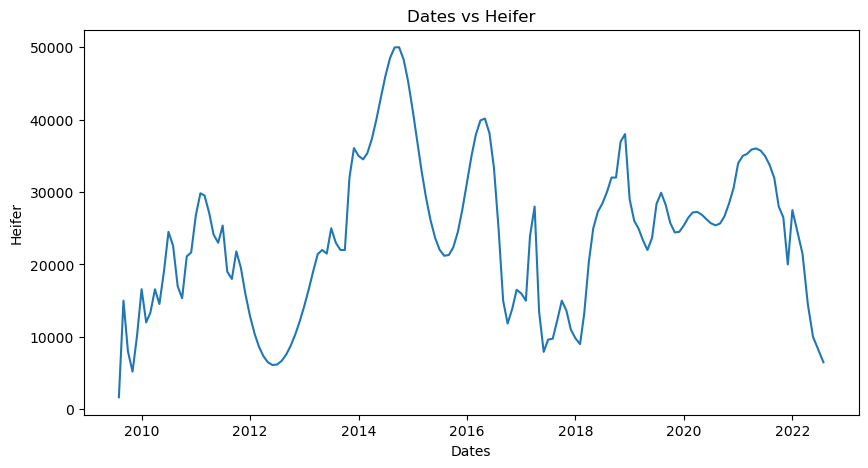

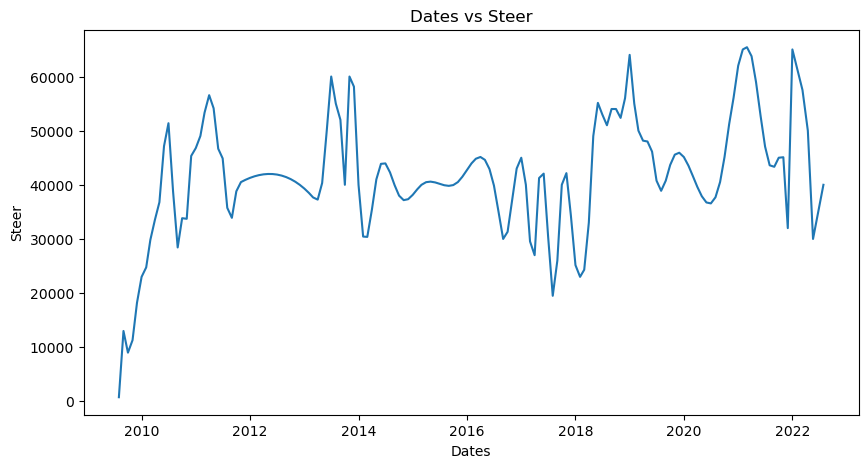

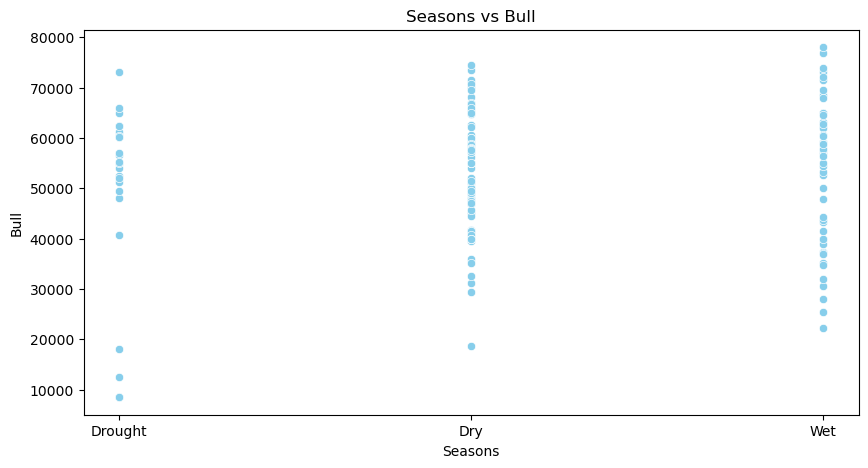

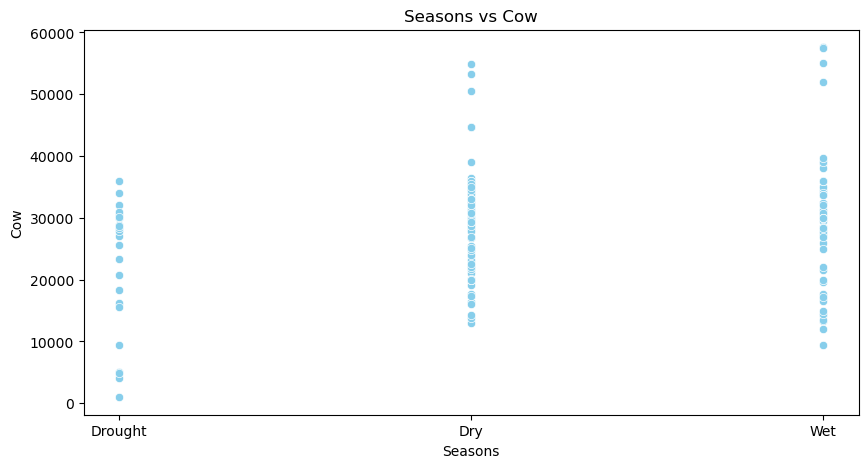

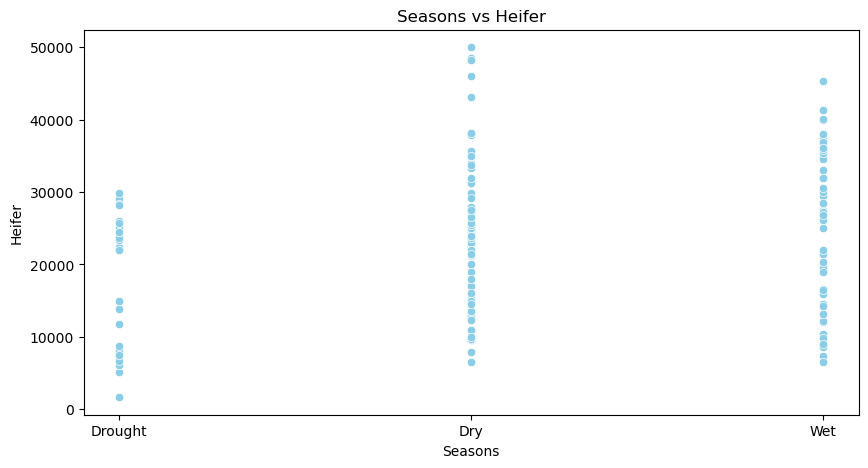

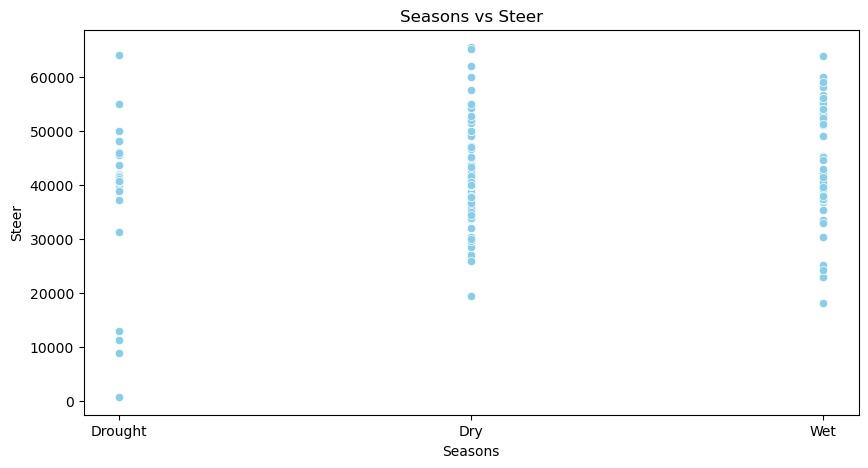

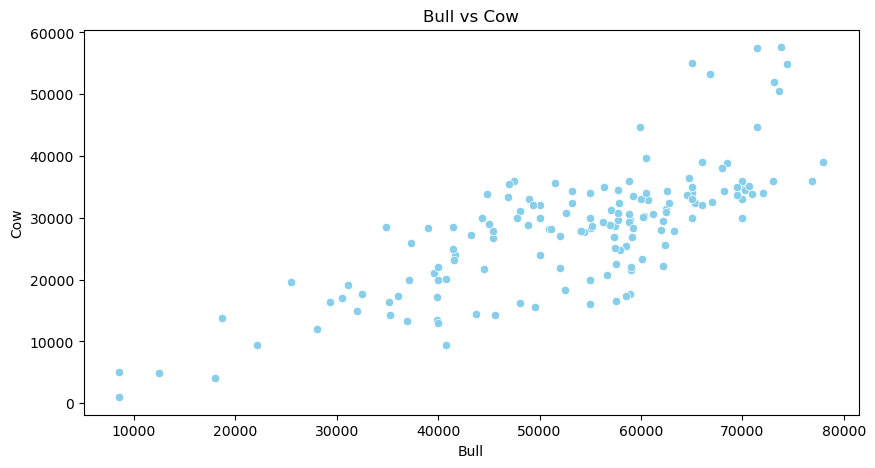

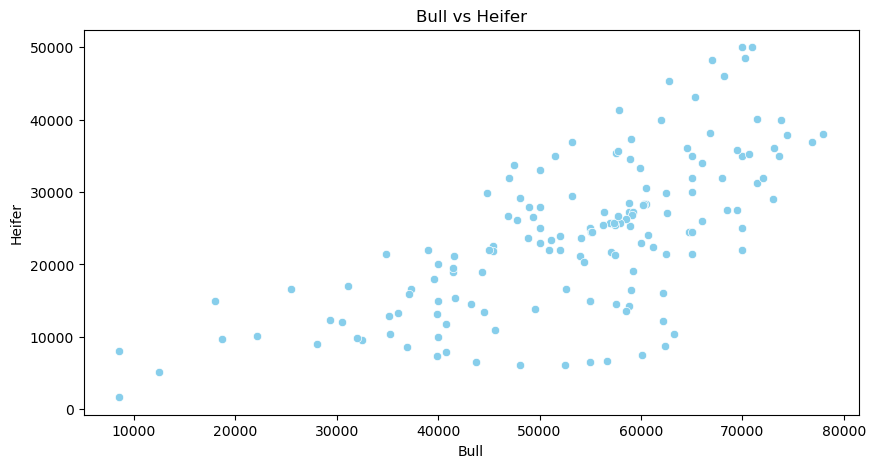

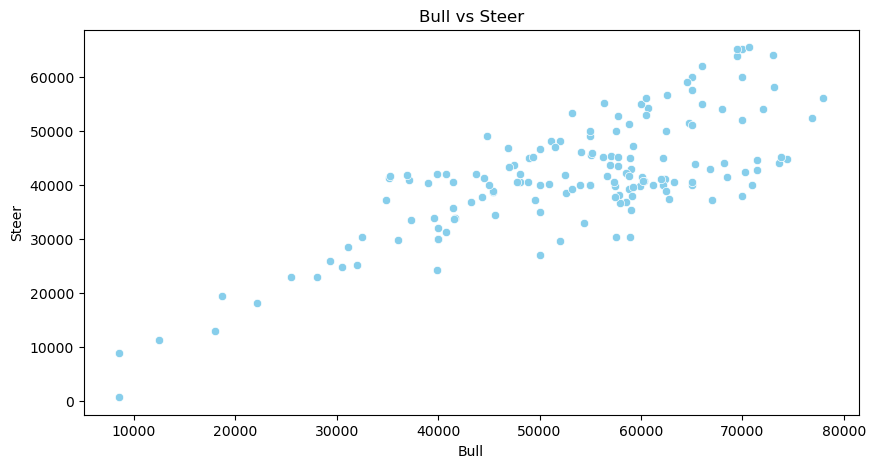

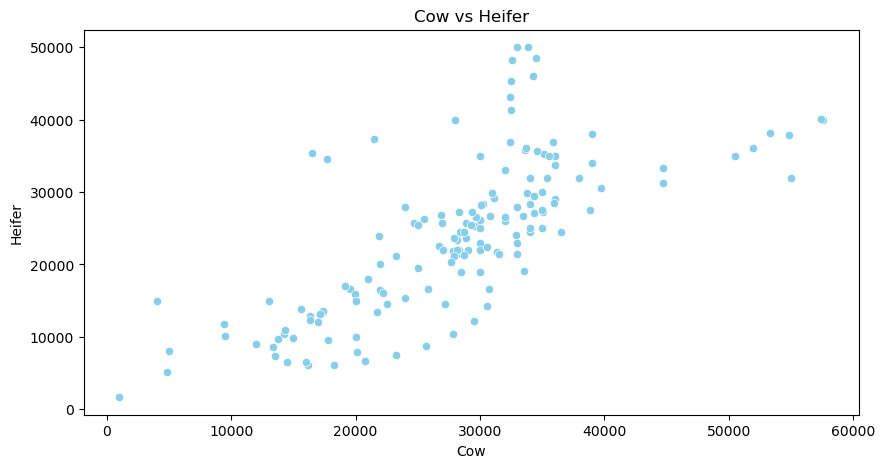

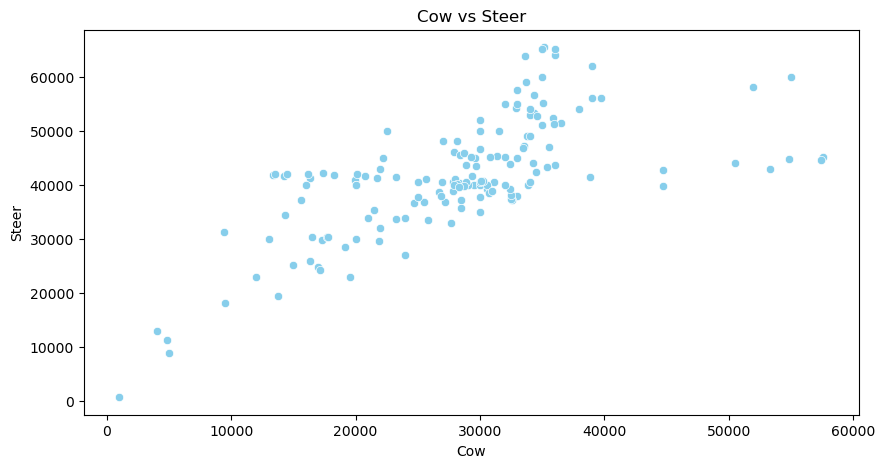

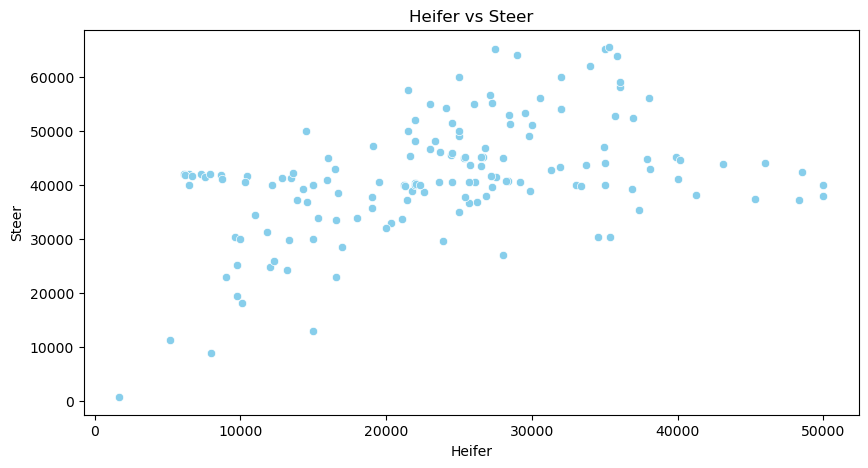

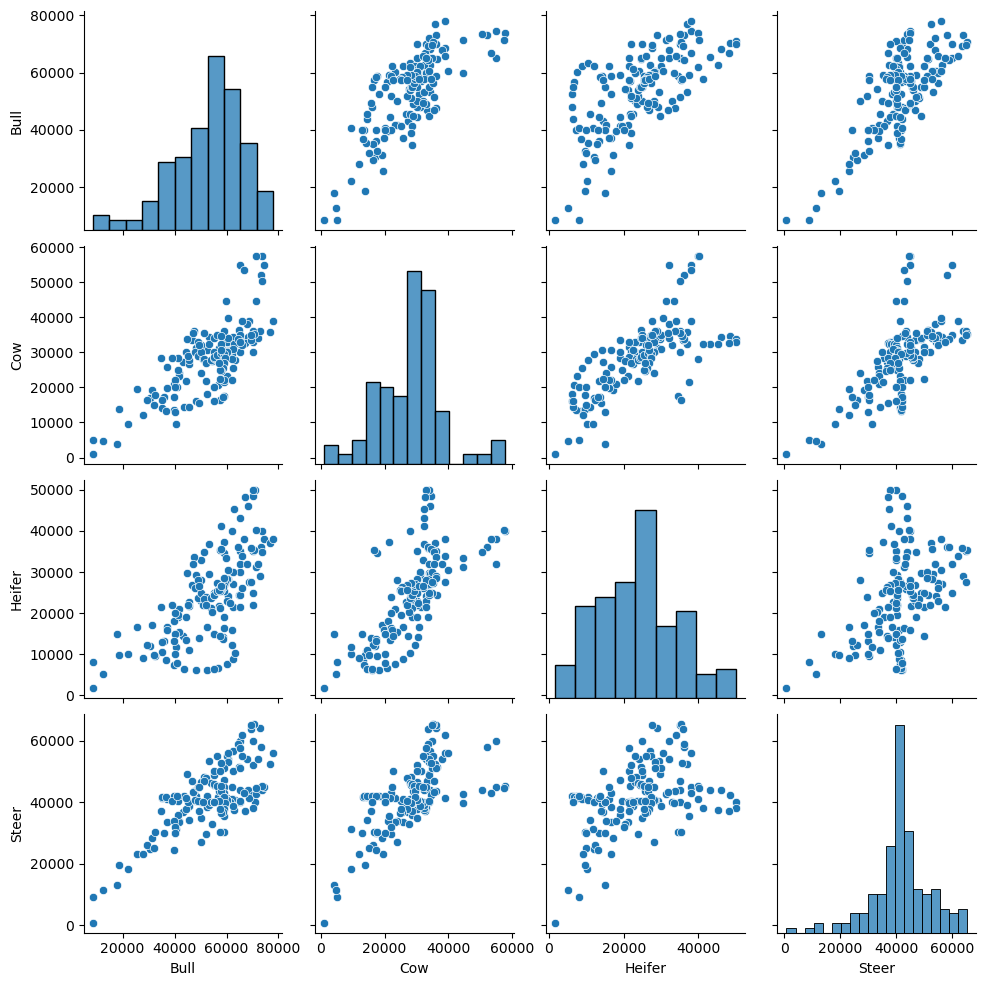

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_dataset(data):
    # Univariate Analysis
    def univariate_analysis(column):
        plt.figure(figsize=(10, 5))
        if data[column].dtype == 'datetime64[ns]':
            data[column].dt.month.value_counts().sort_index().plot(kind='bar', color='skyblue')
            plt.title('Monthly Distribution of ' + column)
            plt.xlabel('Month')
            plt.ylabel('Frequency')
        elif data[column].dtype.name == 'category':
            data[column].value_counts().plot(kind='bar', color='skyblue')
            plt.title('Distribution of ' + column)
            plt.xlabel(column)
            plt.ylabel('Frequency')
        else:
            sns.histplot(data[column], kde=True, color='skyblue')
            plt.title('Distribution of ' + column)
            plt.xlabel(column)
            plt.ylabel('Frequency')
        plt.show()

    # Bivariate Analysis
    def bivariate_analysis(x, y):
        plt.figure(figsize=(10, 5))
        if data[x].dtype == 'datetime64[ns]':
            sns.lineplot(data=data, x=x, y=y)
            plt.title('{} vs {}'.format(x, y))
        elif data[x].dtype.name == 'category' and data[y].dtype.name == 'category':
            sns.heatmap(pd.crosstab(data[x], data[y]), annot=True, cmap='coolwarm')
            plt.title('{} vs {}'.format(x, y))
        else:
            sns.scatterplot(data=data, x=x, y=y, color='skyblue')
            plt.title('{} vs {}'.format(x, y))
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

    # Multivariate Analysis
    def multivariate_analysis(columns):
        sns.pairplot(data[columns])
        plt.show()

    # Call functions for analysis
    for column in data.columns:
        univariate_analysis(column)

    for i in range(len(data.columns)):
        for j in range(i+1, len(data.columns)):
            bivariate_analysis(data.columns[i], data.columns[j])

    multivariate_analysis(data.columns)

# Example usage:
analyze_dataset(df)


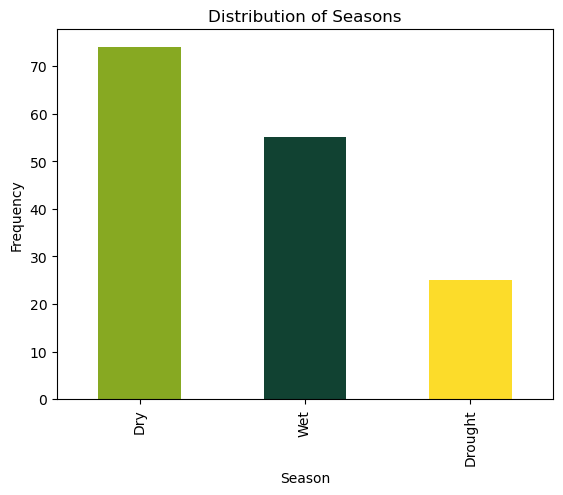

In [39]:
colors = ['#87A922', '#114232', '#FCDC2A']

df['Seasons'].value_counts().plot(kind='bar', color=colors)
plt.title('Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Frequency')
plt.show()


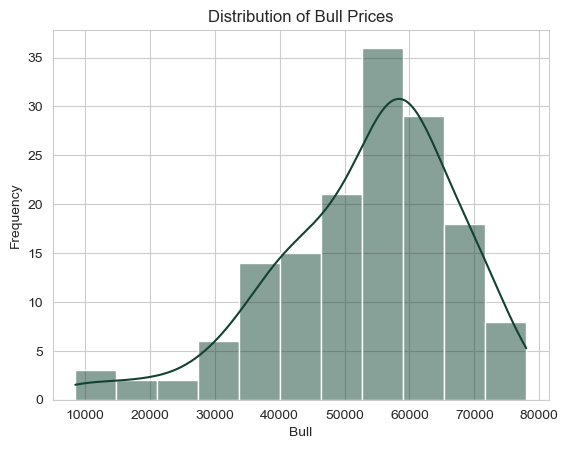

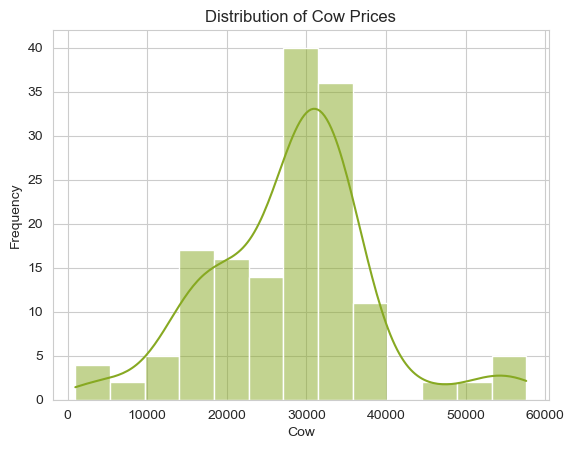

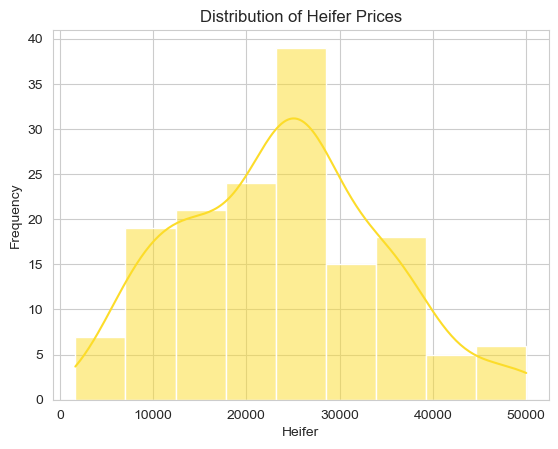

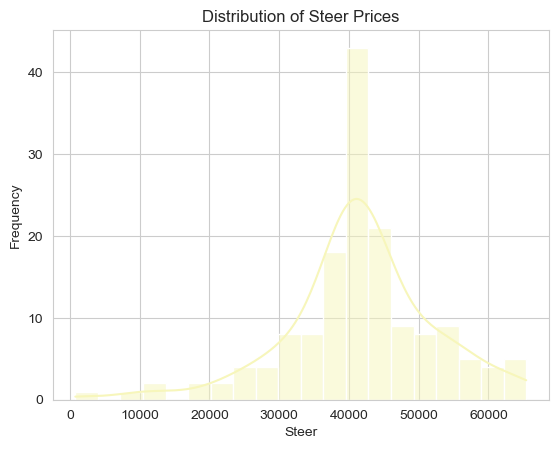

In [50]:
# Define colors for the histograms
colors = ['#114232', '#87A922', '#FCDC2A', '#F7F6BB']

# Loop through each column starting from the fourth column
for column, color in zip(df.columns[2:], colors):
    # Create histogram
    sns.histplot(df[column], kde=True, color=color)
    
    # Set title, x-label, y-label
    plt.title(f'Distribution of {column} Prices')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Show the plot for this column
    plt.show()


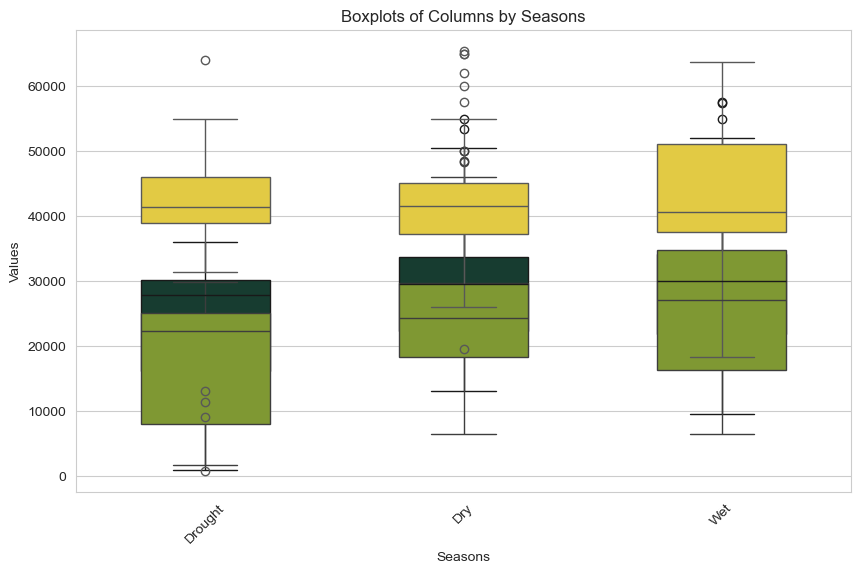

In [51]:
# Define colors as a list
colors = ['#114232', '#87A922', '#FCDC2A', '#F7F6BB']

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Loop through each column starting from the fourth column
for i, column in enumerate(df.columns[3:]):
    # Create boxplot
    sns.boxplot(x='Seasons', y=column, data=df, color=colors[i % len(colors)], width=0.5)
    
# Set title, x-label, y-label
plt.title('Boxplots of Columns by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


<Axes: xlabel='Seasons', ylabel='Bull'>

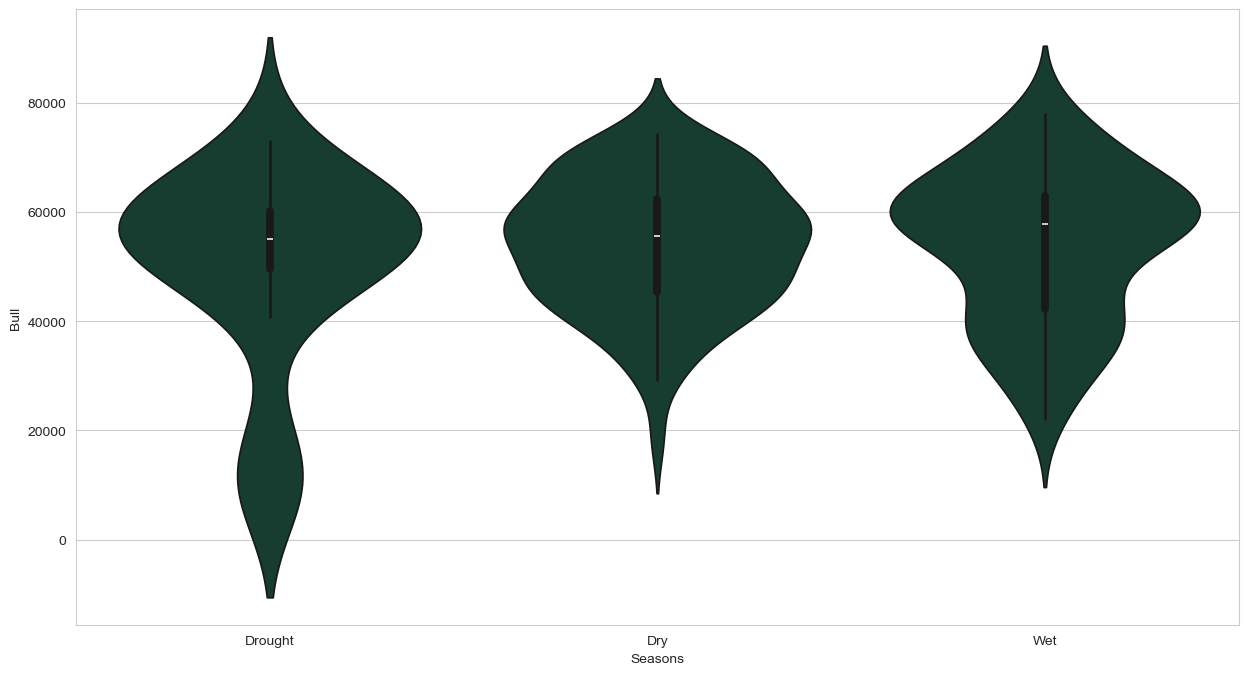

In [75]:

plt.figure(figsize=(15,8))
sns.violinplot(x= 'Seasons' , y = 'Bull', data = df, hue_order=df.Seasons.value_counts(), color='#114232' )

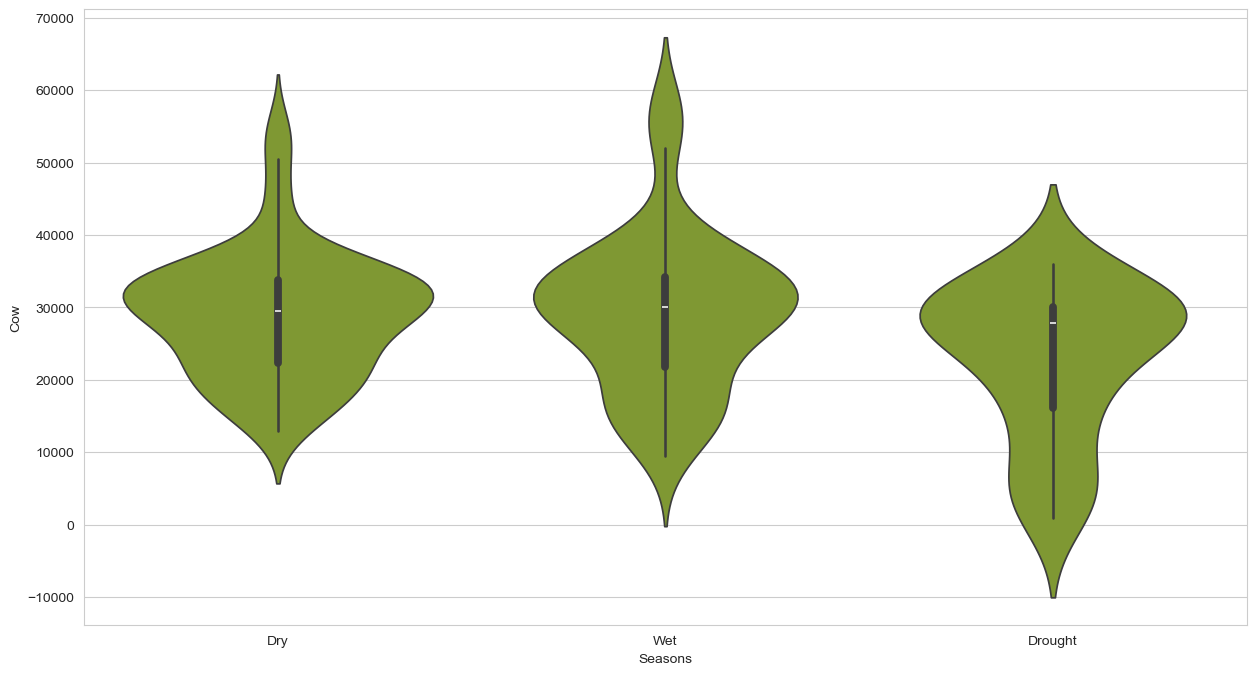

In [76]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Seasons', y='Cow', data=df, order=df['Seasons'].value_counts().index, color= '#87A922',)
plt.show()


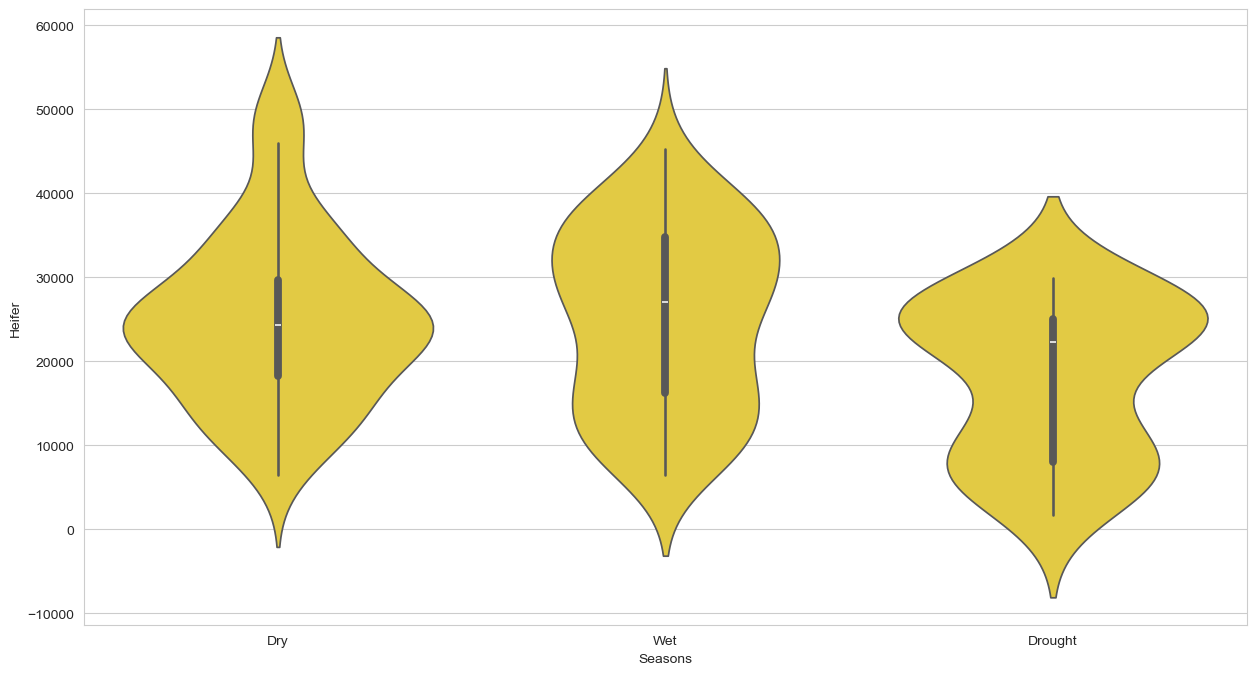

In [71]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Seasons', y='Heifer', data=df, order=df['Seasons'].value_counts().index, color='#FCDC2A' )
plt.show()


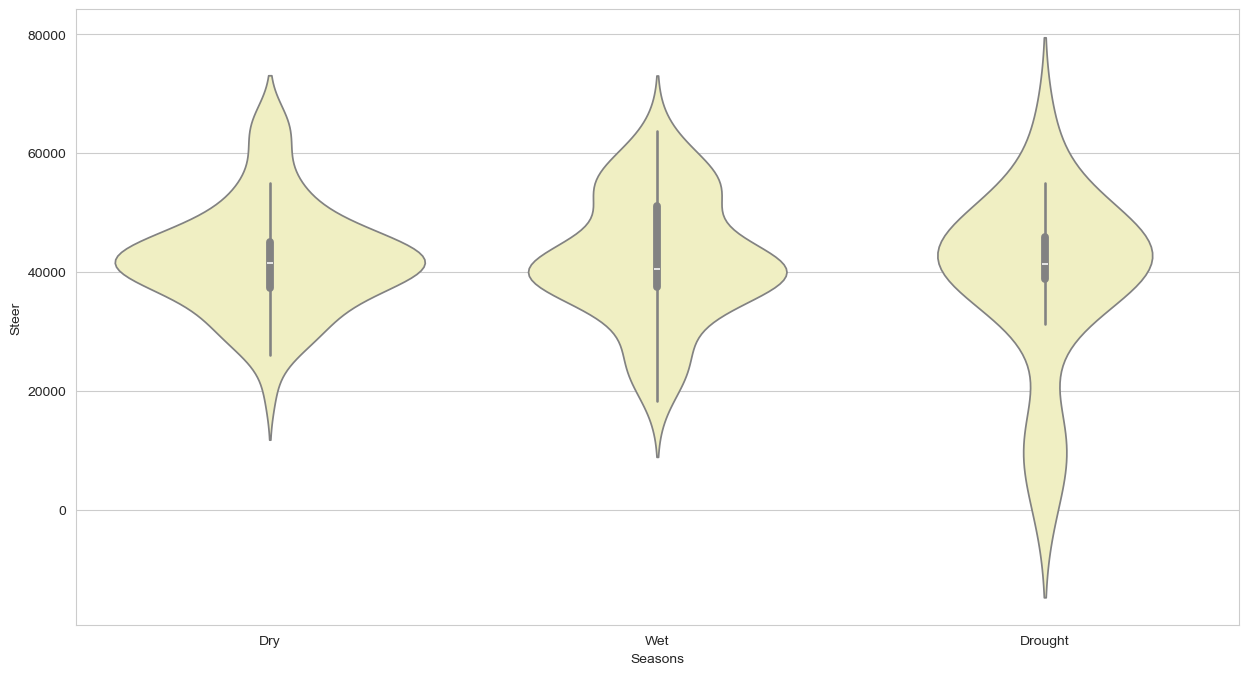

In [77]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='Seasons', y='Steer', data=df, order=df['Seasons'].value_counts().index, color= '#F7F6BB' )
plt.show()

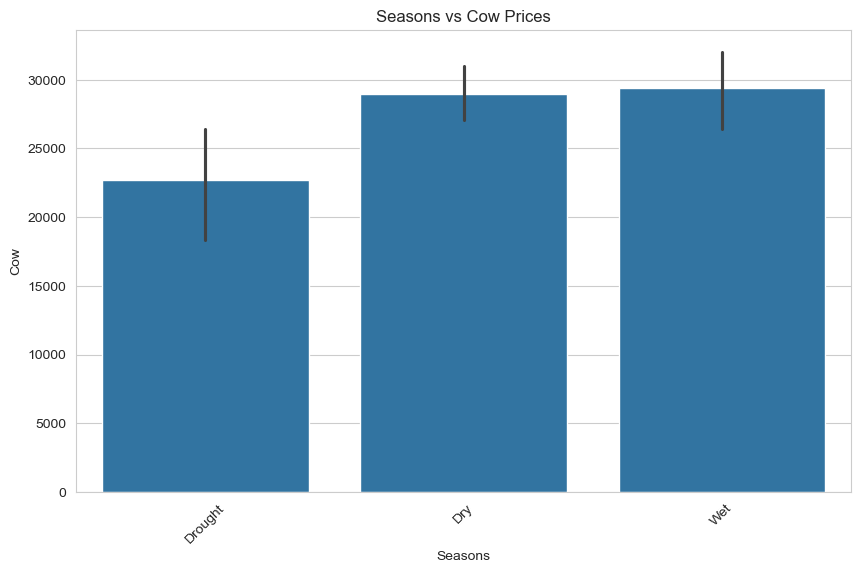

In [74]:
def plot_categorical_vs_numerical(df, categorical_column, numerical_column):
    """
    Plot a bar chart of a categorical column against a numerical column.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        categorical_column (str): The name of the categorical column.
        numerical_column (str): The name of the numerical column.
    """
    # Set the size of the plot
    plt.figure(figsize=(10, 6))

    # Create the bar plot
    sns.barplot(x=categorical_column, y=numerical_column, data=df)

    # Set title and labels
    plt.title(f'{categorical_column} vs {numerical_column} Prices')
    plt.xlabel(categorical_column)
    plt.ylabel(numerical_column)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

plot_categorical_vs_numerical(df, 'Seasons', 'Cow')


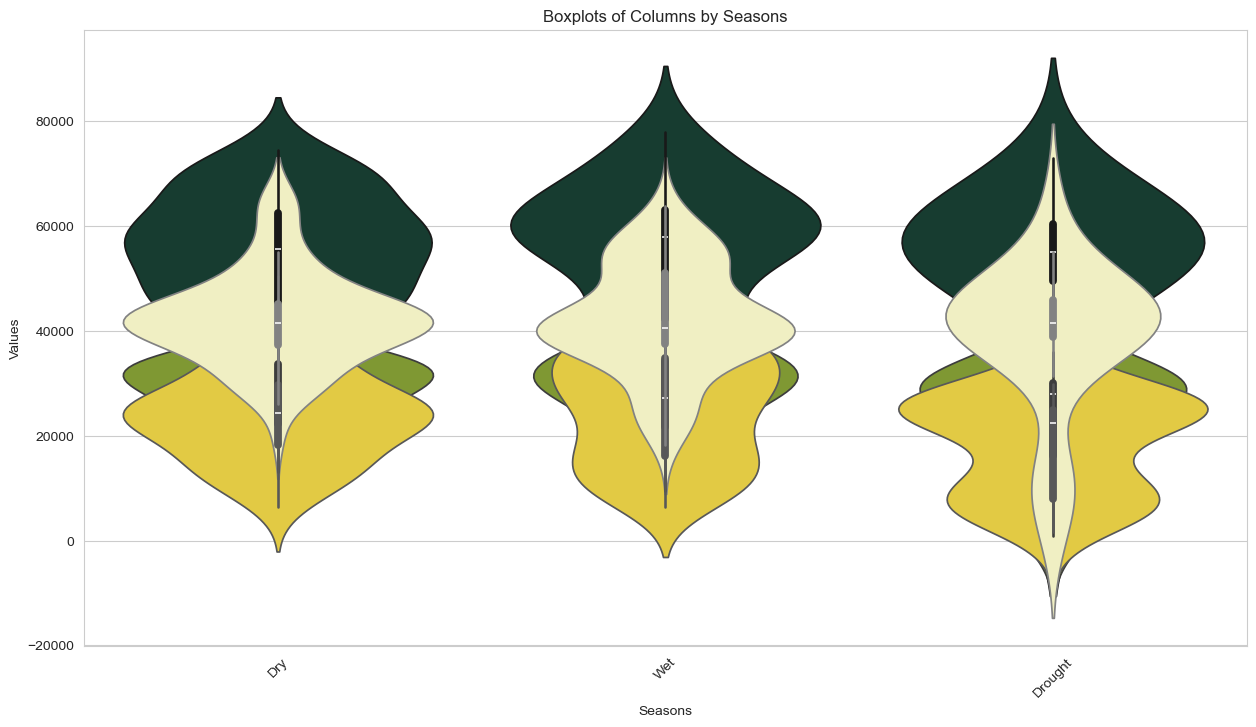

In [64]:


# Set the size of the plot
plt.figure(figsize=(15, 8))

# Define colors as a list
colors = ['#114232', '#87A922', '#FCDC2A', '#F7F6BB']

# Loop through each column in the list
for i, column in enumerate(df.columns[2:]):
    # Create boxplot
    sns.violinplot(x='Seasons', y=column, data=df, order=df['Seasons'].value_counts().index, color=colors[i % len(colors)])
    
# Set title, x-label, y-label
plt.title('Boxplots of Livestock Prices by Seasons')
plt.xlabel('Seasons')
plt.ylabel('Values')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



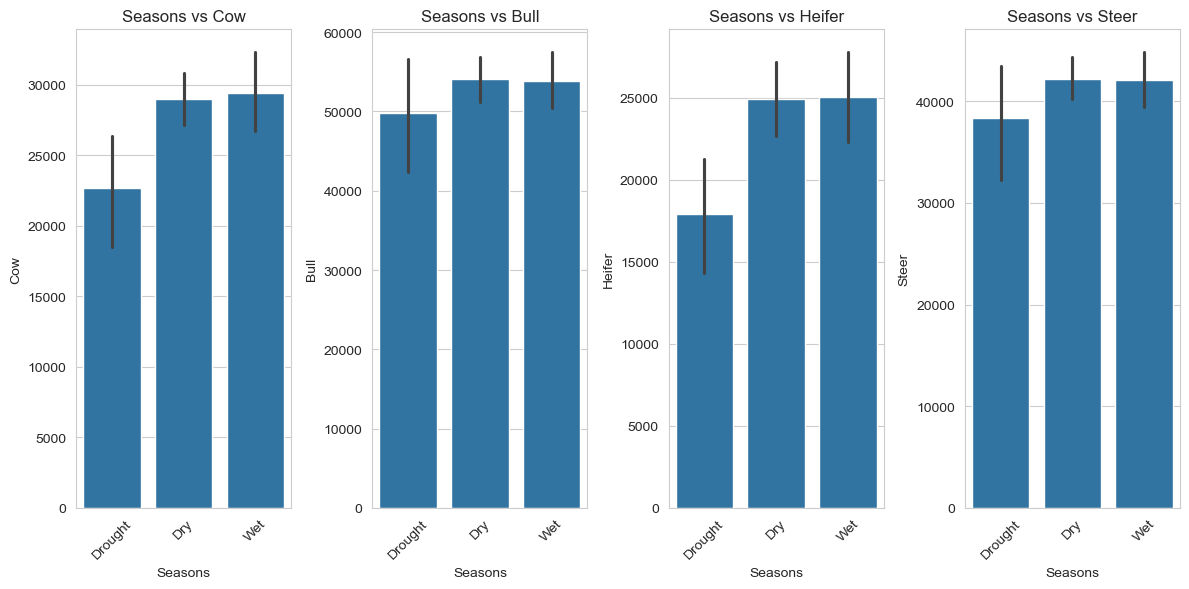

In [79]:

def plot_categorical_vs_numerical(df, categorical_column, numerical_columns):
    """
    Plot bar charts of numerical columns against a categorical column.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        categorical_column (str): The name of the categorical column.
        numerical_columns (list): The names of the numerical columns.
    """
    # Set the size of the plot
    plt.figure(figsize=(12, 6))

    # Loop through each numerical column
    for i, numerical_column in enumerate(numerical_columns, start=1):
        plt.subplot(1, len(numerical_columns), i)
        
        # Create the bar plot
        sns.barplot(x=categorical_column, y=numerical_column, data=df)
        
        # Set title and labels for each subplot
        plt.title(f'{categorical_column} vs {numerical_column}')
        plt.xlabel(categorical_column)
        plt.ylabel(numerical_column)

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

plot_categorical_vs_numerical(df, 'Seasons', ['Cow', 'Bull', 'Heifer','Steer' ])


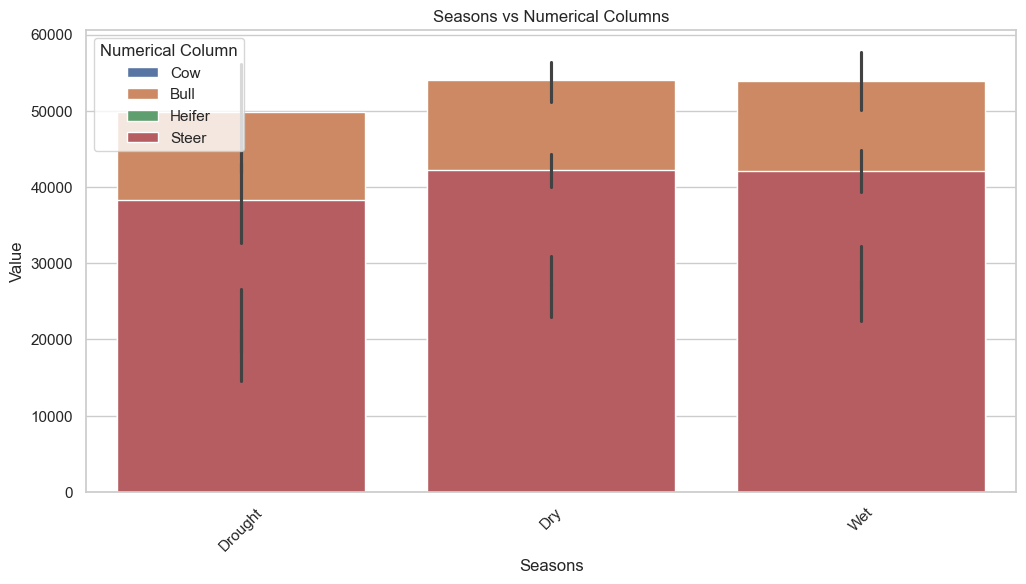

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_vs_numerical(df, categorical_column, numerical_columns):
    """
    Plot bar charts of numerical columns against a categorical column.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        categorical_column (str): The name of the categorical column.
        numerical_columns (list): The names of the numerical columns.
    """
    # Set the size of the plot
    plt.figure(figsize=(12, 6))
    
    # Create a combined barplot for all numerical columns
    for numerical_column in numerical_columns:
        sns.barplot(x=categorical_column, y=numerical_column, data=df, label=numerical_column)

    # Set title and labels
    plt.title(f'{categorical_column} vs Numerical Columns')
    plt.xlabel(categorical_column)
    plt.ylabel('Value')

    # Add legend
    plt.legend(title='Numerical Column')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()


plot_categorical_vs_numerical(df, 'Seasons', ['Cow', 'Bull', 'Heifer', 'Steer'])


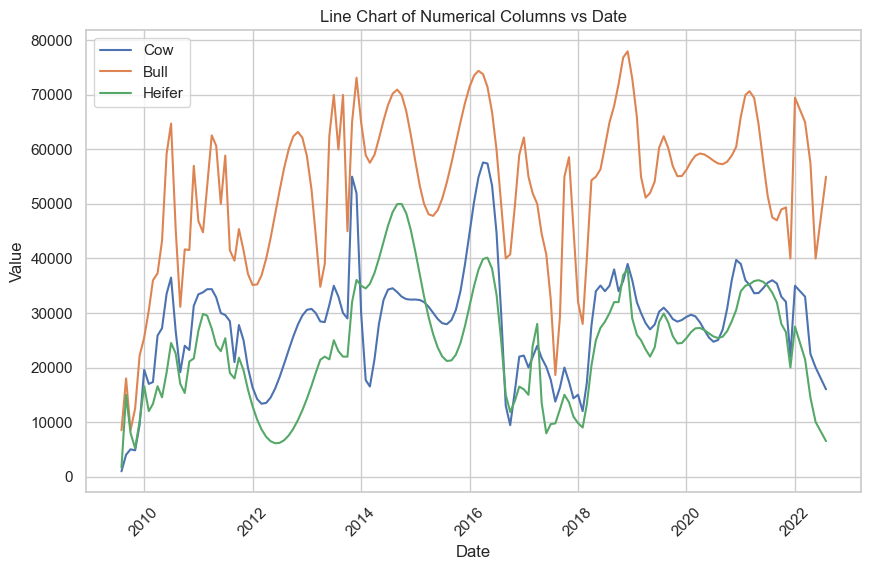

In [88]:
def line_chart_numerical_vs_date(df, date_column, numerical_columns):
    """
    Plot line chart of three numerical columns against dates.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        date_column (str): The name of the date column.
        numerical_columns (list): The names of the numerical columns.
    """
    # Set the size of the plot
    plt.figure(figsize=(10, 6))
    
    # Plot each numerical column against the date
    for column in numerical_columns:
        plt.plot(df[date_column], df[column], label=column)
    
    # Add title and labels
    plt.title('Line Chart of Numerical Columns vs Date')
    plt.xlabel('Date')
    plt.ylabel('Value')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add legend
    plt.legend()
    
    # Show the plot
    plt.show()

line_chart_numerical_vs_date(df, 'Dates', ['Cow', 'Bull', 'Heifer'])


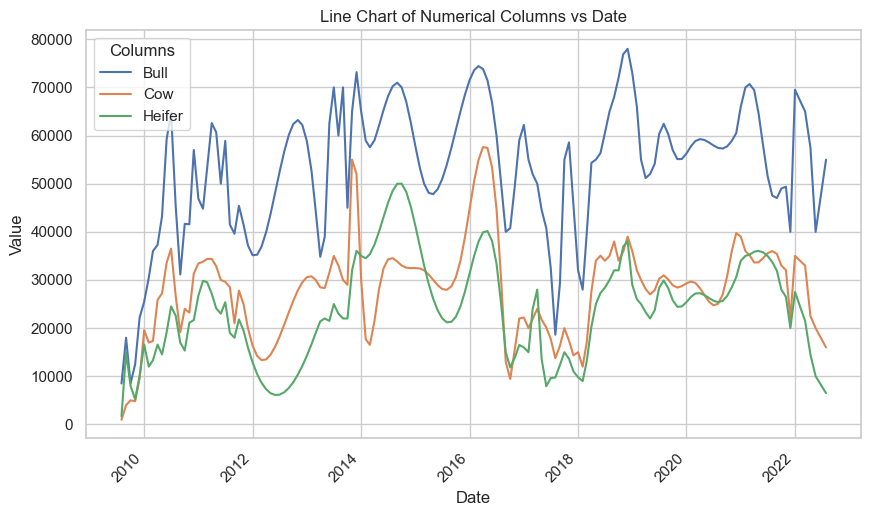

In [90]:
# Assuming your DataFrame is named df
pivot_table = pd.pivot_table(data=df, values=['Cow', 'Bull', 'Heifer'], index='Dates')

# Plot the pivot table
pivot_table.plot(figsize=(10, 6))
plt.title('Line Chart of Numerical Columns vs Date')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Columns')
plt.show()


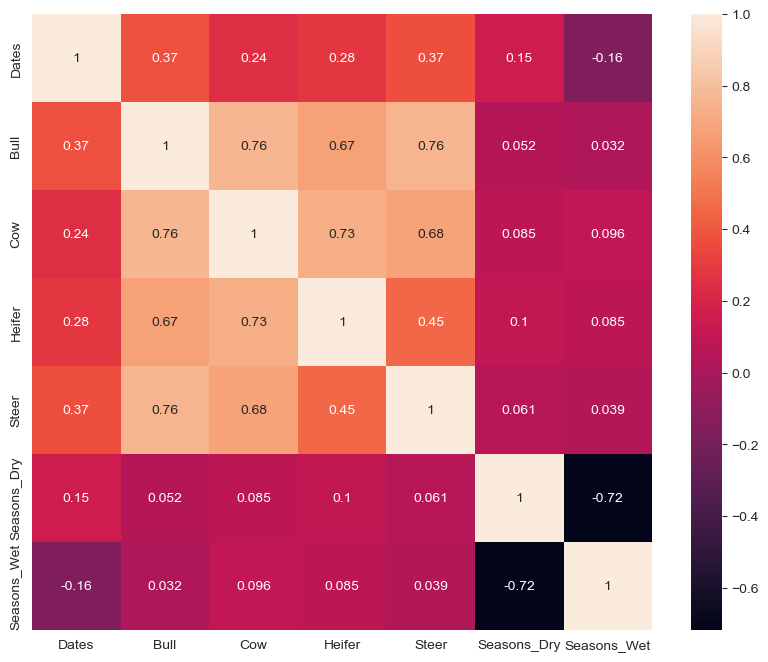

In [66]:
# Assuming 'Seasons' is a categorical column in your DataFrame
# Convert 'Seasons' column to one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Seasons'], drop_first=True)

# Generate the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()


## Modelling

We shall be using Time Series Analysis to predict the livestock prices 

Let us create 4 different dataframes to the different animals sold

#### Cow

In [92]:
Cow= df.loc[:, ['Dates', 'Cow']]
Cow.set_index('Dates', inplace= True)
Cow.head()

,Cow
Dates,
2009-08-01,966.666667
2009-09-01,4000.000000
2009-10-01,5000.000000
2009-11-01,4815.021851
2009-12-01,9477.777778


#### Bulls

In [96]:
Bull= df.loc[:, ['Dates', 'Bull']]
Bull.set_index('Dates', inplace= True)
Bull.head()

,Bull
Dates,
2009-08-01,8500.000000
2009-09-01,18000.000000
2009-10-01,8500.000000
2009-11-01,12484.312740
2009-12-01,22166.666667


#### Heifers

In [97]:
Heifer= df.loc[:, ['Dates', 'Heifer']]
Heifer.set_index('Dates', inplace= True)
Heifer.head()

,Heifer
Dates,
2009-08-01,1666.666667
2009-09-01,15000.000000
2009-10-01,8000.000000
2009-11-01,5198.550137
2009-12-01,10111.111111


#### Steers

In [98]:
Steer= df.loc[:, ['Dates', 'Steer']]
Steer.set_index('Dates', inplace= True)
Steer.head()

,Steer
Dates,
2009-08-01,766.666667
2009-09-01,13000.000000
2009-10-01,9000.000000
2009-11-01,11302.715033
2009-12-01,18222.222222


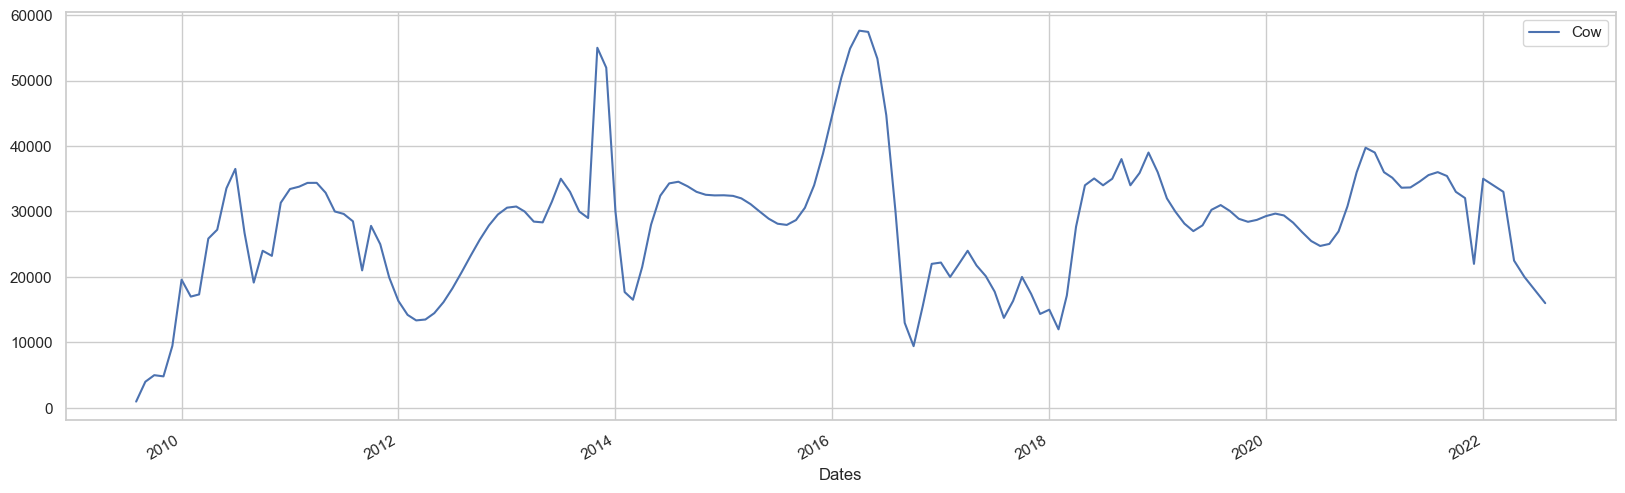

In [95]:
Cow.plot(figsize=(20,6));

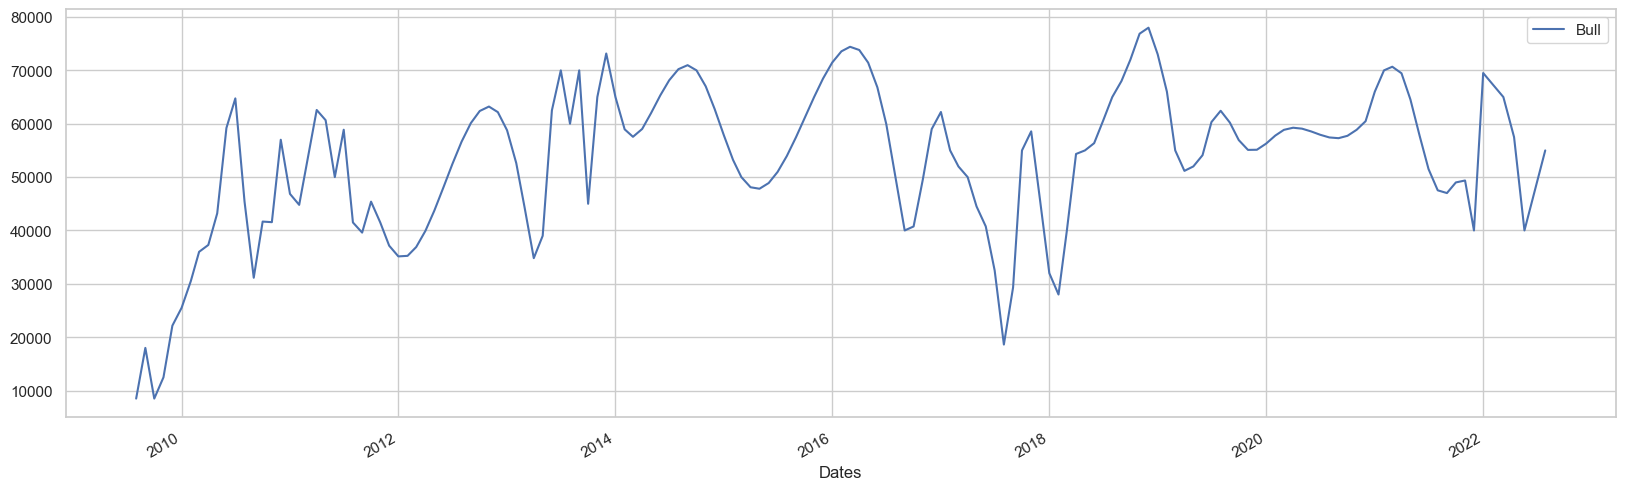

In [99]:
Bull.plot(figsize=(20,6));

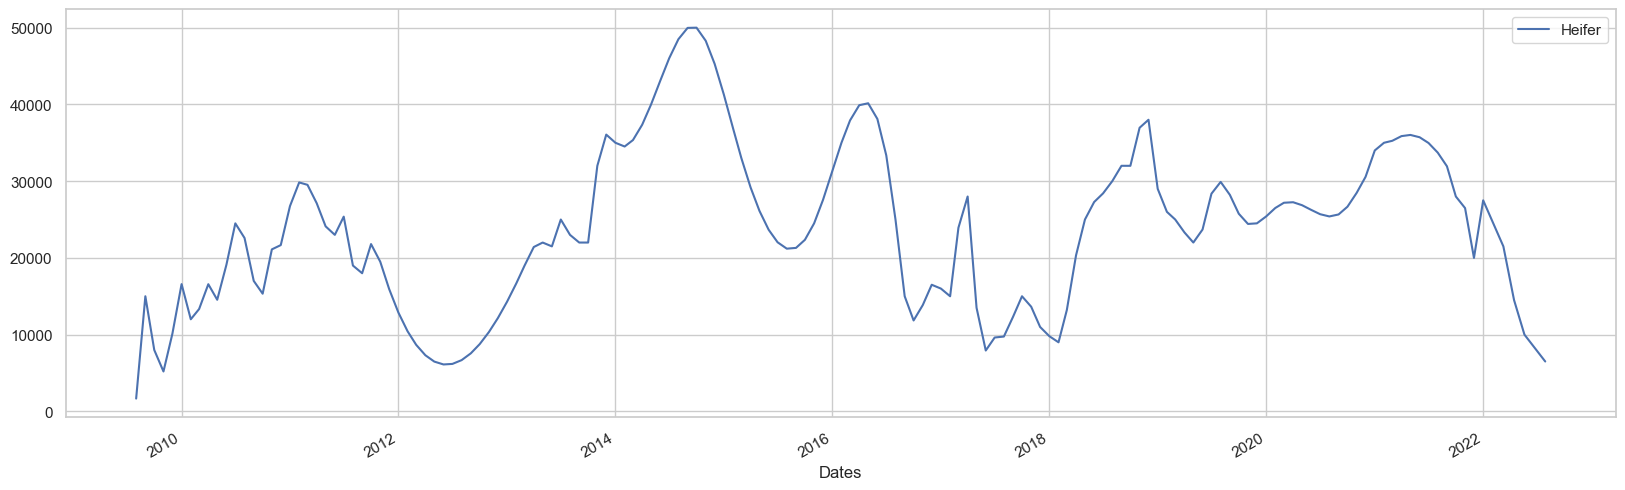

In [100]:
Heifer.plot(figsize=(20,6));

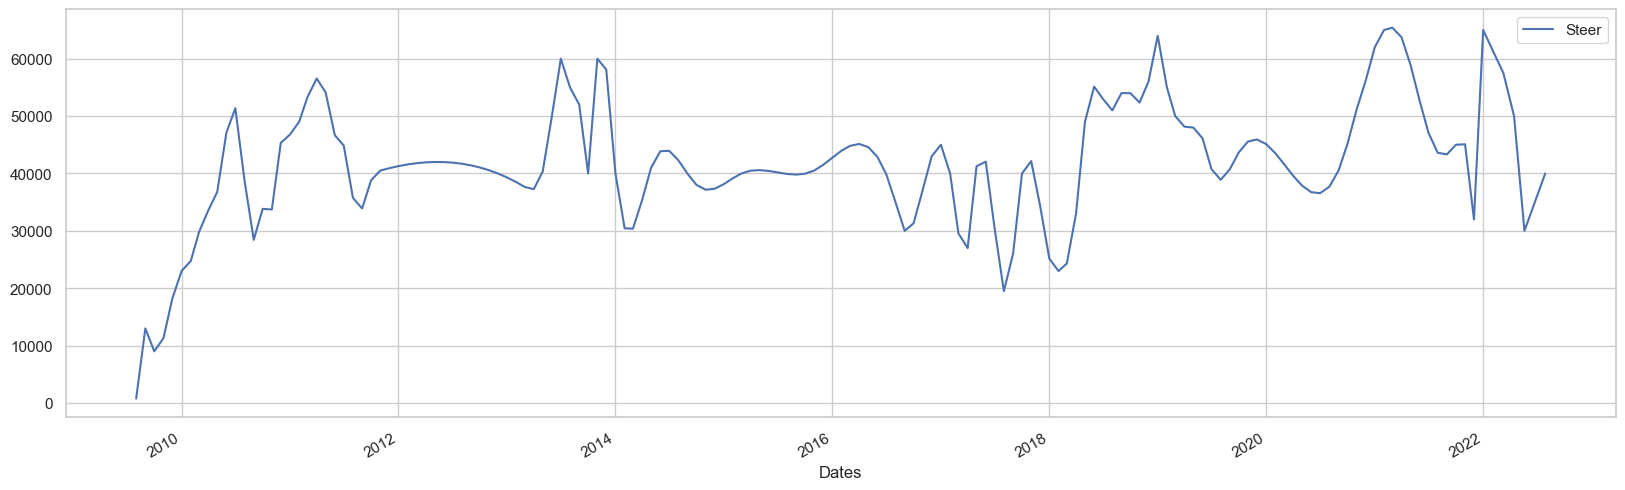

In [101]:
Steer.plot(figsize=(20,6));

In [109]:
# checking for rolling statistics

roll_mean = Cow.rolling(window=3, center=False).mean()
roll_std = Cow.rolling(window= 3, center=False).std()

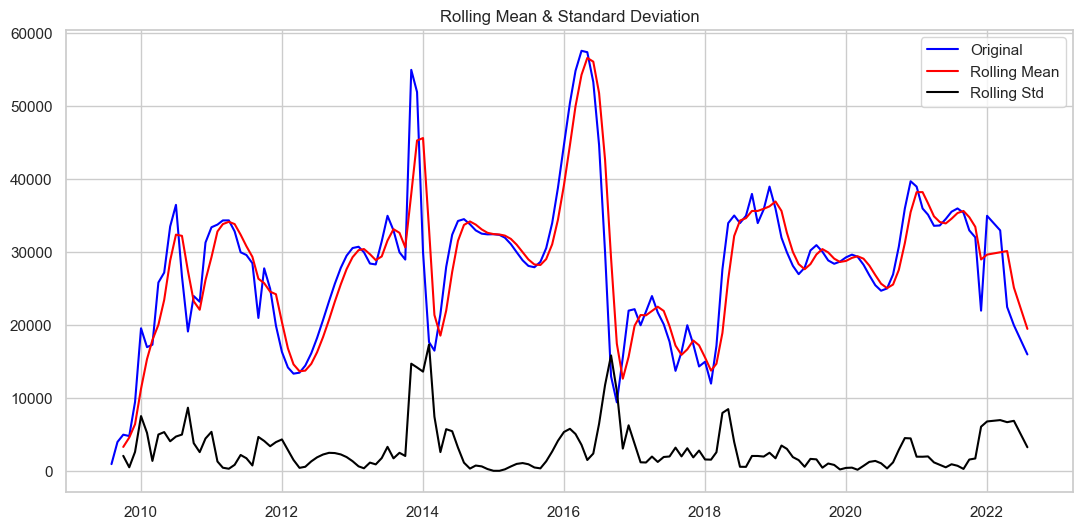

In [110]:
fig = plt.figure(figsize=(13,6))
plt.plot(Cow, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#### Stationarity
Checking for `Stationarity` using the Augmented Dickey-Fuller (ADF) Test

The ADF test is commonly used in econometrics, finance, and other fields dealing with time series data to determine the stationarity of a series before applying further analysis or modeling techniques.

In [112]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(Cow)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print('-------------')
print(dfoutput)

(-4.96263568466864, 2.6299139703929133e-05, 1, 152, {'1%': -3.474120870218417, '5%': -2.880749791423677, '10%': -2.5770126333102494}, 2729.4514003041477)
-------------
Test Statistic                  -4.962636
p-value                          0.000026
#Lags Used                       1.000000
Number of Observations Used    152.000000
Critical Value (1%)             -3.474121
Critical Value (5%)             -2.880750
Critical Value (10%)            -2.577013
dtype: float64


* Test Statistic: The test statistic value of approximately -4.96.
* p-value: The p-value is approximately 0.000026, which is below the common significance levels (e.g., 0.05 or 0.01). This suggests strong evidence against the null hypothesis (the time series has a unit root) and indicates that the time series is likely stationary.
* #Lags Used: The number of lags used in the regression when computing the test statistic, which is 1 in this case.
Number of Observations Used: The number of observations used in the ADF regression, which is 152.
* Critical Values: These are the critical values for the test statistic at the 1%, 5%, and 10% significance levels. The test statistic needs to be lower than these values for the null hypothesis to be rejected.
* The ADF test statistic is more negative than the critical values at all common significance levels, indicating that you can reject the null hypothesis of a unit root. Thus, the series appears to be stationary.

### Seasonality

In [117]:
monthly_sales = Cow.groupby(pd.Grouper( freq='M')).sum()

# group dataframe by year and sum sales for each year
yearly_sales = Cow.groupby(pd.Grouper(freq='Y')).sum()


/var/folders/5c/vtxgkysx5h7d7g12w0hycxj40000gn/T/ipykernel_8485/971406078.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = Cow.groupby(pd.Grouper( freq='M')).sum()
/var/folders/5c/vtxgkysx5h7d7g12w0hycxj40000gn/T/ipykernel_8485/971406078.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sales = Cow.groupby(pd.Grouper(freq='Y')).sum()


In [118]:
#import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data using an additive model
seasonal_decompose(Cow['Cow'].resample('MS').mean().dropna(), model='additive').plot()
plt.show()


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [119]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure that the time series data has a DatetimeIndex with frequency
Cow_resampled = Cow['Cow'].resample('MS').mean().dropna()

# Decompose the time series data using an additive model
decomposition = seasonal_decompose(Cow_resampled, model='additive')
decomposition.plot()
plt.show()


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

/var/folders/5c/vtxgkysx5h7d7g12w0hycxj40000gn/T/ipykernel_8485/2552043438.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Cow_resampled = Cow['Cow'].resample('MS').mean().fillna(method='ffill')


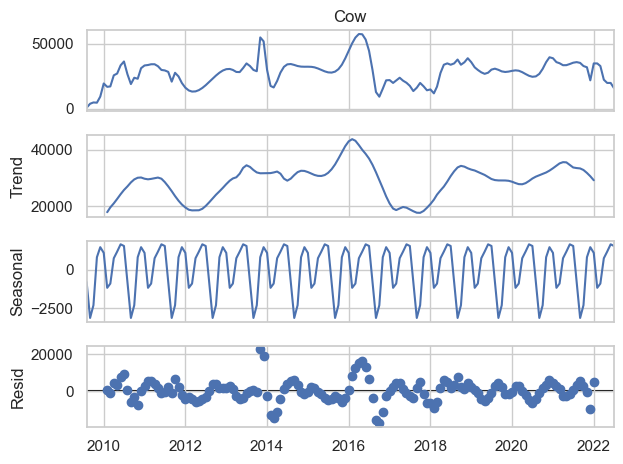

In [121]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Fill missing values using forward fill
Cow_resampled = Cow['Cow'].resample('MS').mean().fillna(method='ffill')

# Decompose the time series data using an additive model
decomposition = seasonal_decompose(Cow_resampled, model='additive')
decomposition.plot()
plt.show()


/var/folders/5c/vtxgkysx5h7d7g12w0hycxj40000gn/T/ipykernel_8485/3821354967.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  decomposition = seasonal_decompose(Cow['Cow'].resample('MS').mean().fillna(method='ffill'), model='additive')


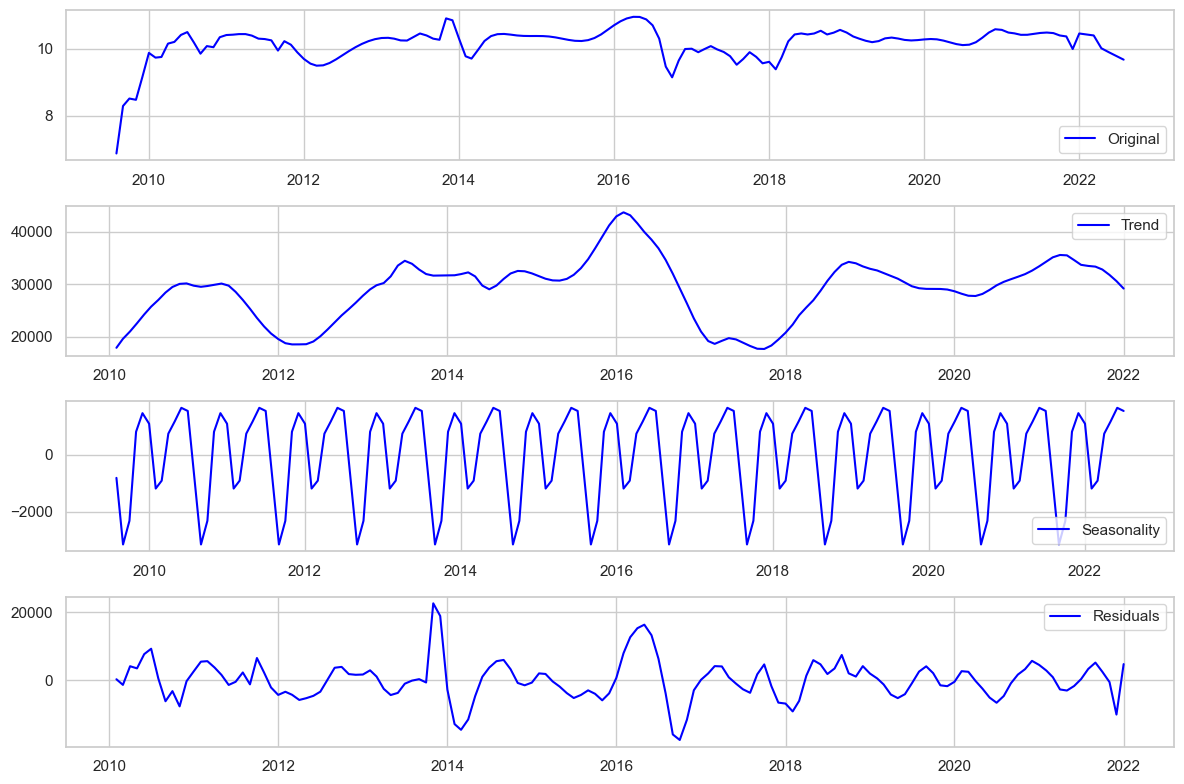

In [123]:
from statsmodels.tsa.seasonal import seasonal_decompose
Cow.fillna(Cow.mean(), inplace=True)
decomposition = seasonal_decompose(Cow['Cow'].resample('MS').mean().fillna(method='ffill'), model='additive')

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(Cow), label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()